In [2]:
## Importing Libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [4]:
## Importing Data set ords_prods_merge
ords_prods_merge = pd.read_pickle(r'/Users/javieraquezada/Desktop/05-2025 Instacart Basket Analysis/02 Data/Prepared Data/ords_prods_merge_new_variables3.pkl')

In [10]:
##Creating Path
path = r'/Users/javieraquezada/Desktop/05-2025 Instacart Basket Analysis'

<Axes: xlabel='orders_day_of_week'>

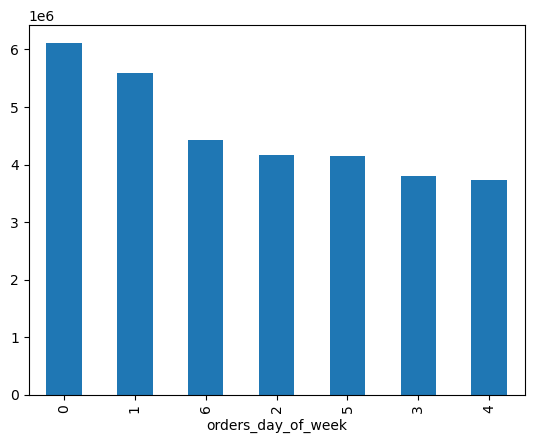

In [11]:
##Creating Bar Charts
ords_prods_merge['orders_day_of_week'].value_counts().plot.bar()

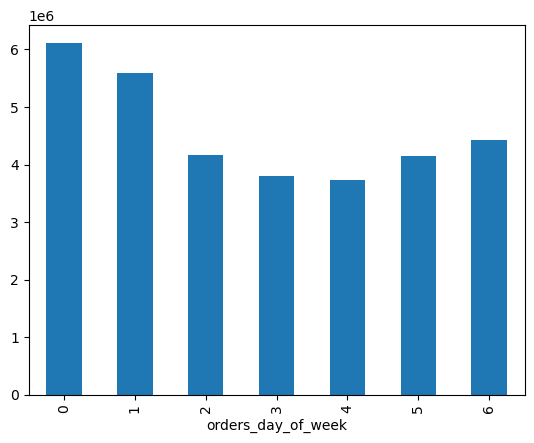

In [12]:
## sorting observations
bar = ords_prods_merge['orders_day_of_week'].value_counts().sort_index().plot.bar()

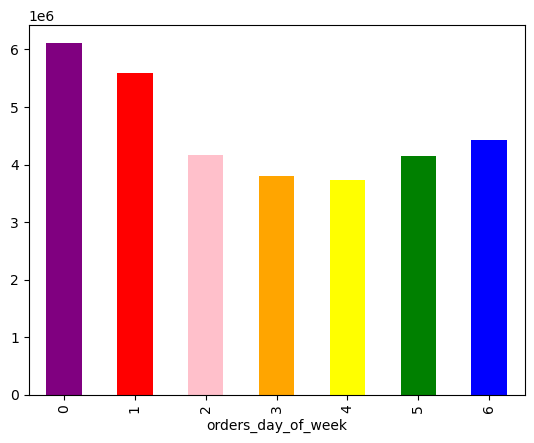

In [13]:
## Changing color
bar = ords_prods_merge['orders_day_of_week'].value_counts().sort_index().plot.bar(color=['purple','red','pink','orange','yellow','green','blue'])

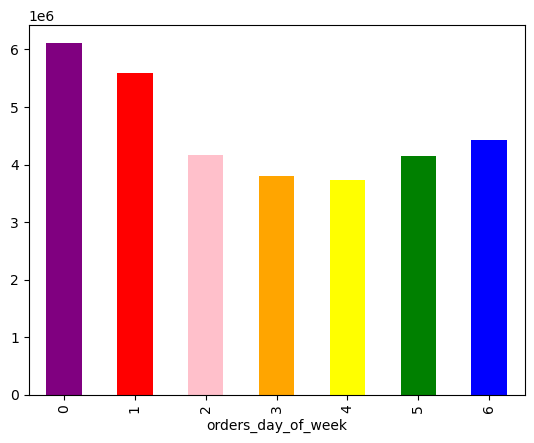

In [14]:
## Exporting Charts.
## adding the name bar to the code makes it be saved in Jupiter's memory.
bar.figure

In [15]:
## Exporting the chart outside of Jupyter in the form of an image file.
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_orders_dow.png'))


<Axes: ylabel='Frequency'>

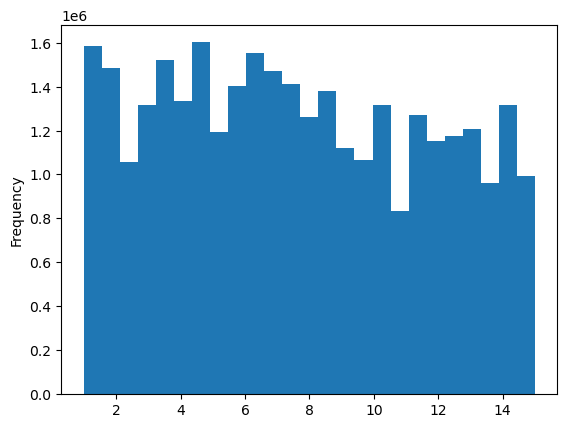

In [16]:
## Creating Histograms and Scatterplots
##Creating historgram for the prices column
ords_prods_merge['prices'].plot.hist(bins = 25)

In [17]:
## Data Consistency Check
ords_prods_merge['prices'].describe()

count    3.198718e+07
mean     7.625666e+00
std      3.997539e+00
min      1.000000e+00
25%      4.200000e+00
50%      7.300000e+00
75%      1.110000e+01
max      1.500000e+01
Name: prices, dtype: float64

In [18]:
ords_prods_merge['prices'].mean()

7.625665706521622

In [19]:
ords_prods_merge['prices'].median()

7.3

In [20]:
ords_prods_merge['prices'].max()

15.0

<Axes: xlabel='prices', ylabel='prices'>

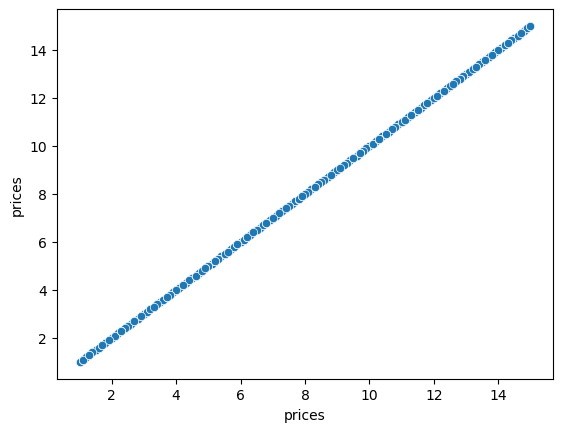

In [25]:
## Cheking correlation
sns.scatterplot(x = 'prices', y = 'prices',data = ords_prods_merge)

In [26]:
## Checking with the original dataframe
## Importing Data set ords_prods_merge
df_ords_prods_merge = pd.read_pickle(r'/Users/javieraquezada/Desktop/05-2025 Instacart Basket Analysis/02 Data/Prepared Data/ords_prods_merge_new_variables2.pkl')

<Axes: ylabel='Frequency'>

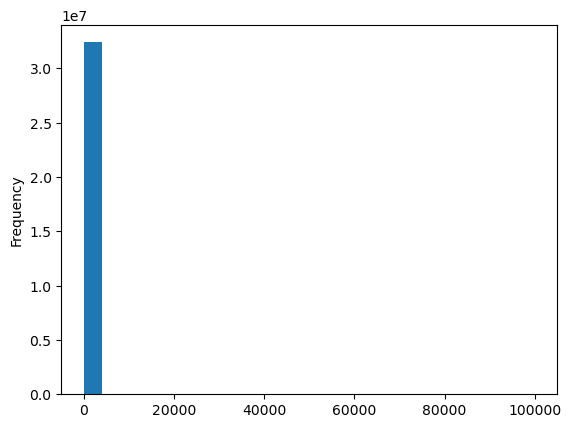

In [28]:
##Creating historgram for the prices column
df_ords_prods_merge['prices'].plot.hist(bins = 25)

In [29]:
## Data Consistency Check
df_ords_prods_merge['prices'].describe()

count    3.240486e+07
mean     1.198023e+01
std      4.956554e+02
min      1.000000e+00
25%      4.200000e+00
50%      7.400000e+00
75%      1.130000e+01
max      9.999900e+04
Name: prices, dtype: float64

In [30]:
df_ords_prods_merge['prices'].mean()

11.980225638383402

In [31]:
df_ords_prods_merge['prices'].median()

7.4

In [32]:
df_ords_prods_merge['prices'].max()

99999.0

<Axes: xlabel='prices', ylabel='prices'>

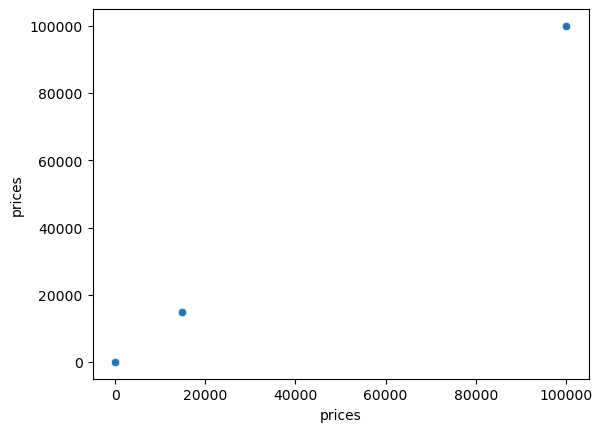

In [33]:
## Cheking correlation
sns.scatterplot(x = 'prices', y = 'prices',data = df_ords_prods_merge)

In [39]:
df_ords_prods_merge.loc[df_ords_prods_merge['prices']>100]

,Unnamed: 0_x,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,...,aisle_id,department_id,prices,price_range_loc,busiest_day,busiest_days,busiests_days,busiest_period_of_day,max_order,loyalty_flag


In [40]:
## Marking outliers as missing data
df_ords_prods_merge.loc[df_ords_prods_merge['prices'] >100, 'prices'] = np.nan

In [41]:
## Checking if the replacement was succesfully made
df_ords_prods_merge['prices'].max()

25.0

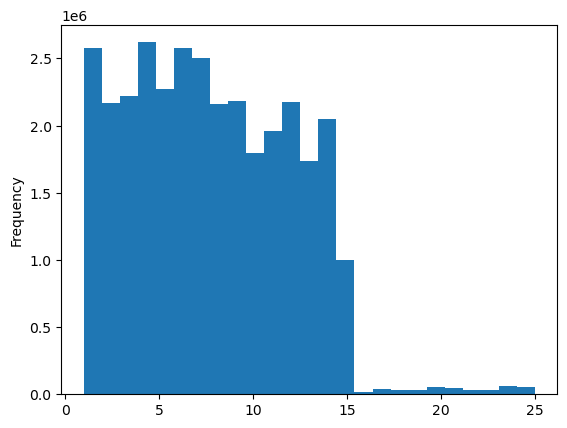

In [42]:
## Retrying Histogram
hist= df_ords_prods_merge['prices'].plot.hist(bins = 25)

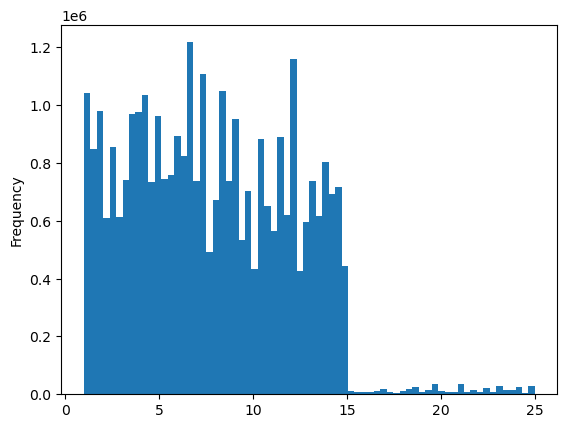

In [43]:
hist= df_ords_prods_merge['prices'].plot.hist(bins = 70)

In [44]:
## Exporting histogram outside of Jupyter in the form of an image file.
hist.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_orders_dow.png'))

In [45]:
##Creating Line Charts
## Sampling data for this specific situation due to the size of the data set and subseting not being enough representative of the entire population.
## due to selection of rows should be randomized

In [46]:
## step 1 creating random samples
np.random.seed(4)
dev = np.random.rand(len(df_ords_prods_merge)) <= 0.7

In [47]:
dev

array([False,  True, False, ...,  True,  True,  True])

In [48]:
## Picture of what the function does
np.random.rand(10)

array([0.79555729, 0.6652899 , 0.04000166, 0.90958442, 0.0493868 ,
       0.6829014 , 0.09612088, 0.92855965, 0.51356997, 0.69561069])

In [49]:
##Spliting dataframe into two samples
## Store 70% of the sample in the dataframe big
big = df_ords_prods_merge[dev]

In [50]:
## Store 30% of the sample in the dataframe small
small = df_ords_prods_merge[~dev]

In [51]:
## Consistency checks
len(df_ords_prods_merge)

32435059

In [52]:
len(big)+len(small)

32435059

In [53]:
## Numbers match, meaning that subsetting procedure was succesful in the technical sense.

In [54]:
## Last step before creating the chart, for speeding up processing time even further reducing your samples to only those columns
## necessary for the chart: "prices" and "orders_day_of_week"
df_2 = small[['orders_day_of_week','prices']]

In [55]:
## Consitency check
df_2

,orders_day_of_week,prices
0,2,9.0
2,2,4.4
3,2,4.7
6,3,3.0
10,3,4.0
...,...,...
32435010,4,5.8
32435017,5,4.8
32435030,1,11.3
32435043,1,3.7


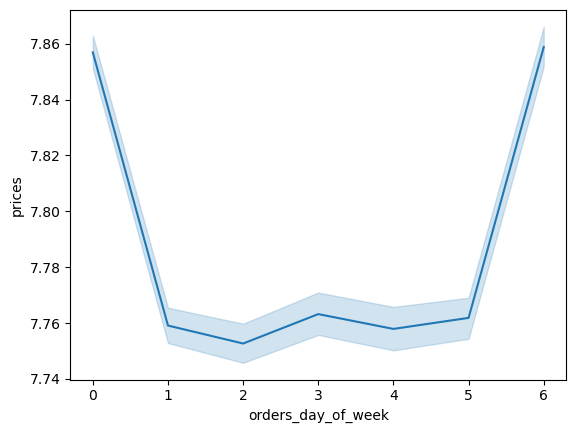

In [56]:
## Creating chart
line= sns.lineplot(data= df_2, x= 'orders_day_of_week', y='prices')

In [57]:
## Exporting the chart outside of Jupyter in the form of an image file.
line.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_orders_dow.png'))

In [54]:
df_ords_prods_merge.head()

,Unnamed: 0_x,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,...,aisle_id,department_id,prices,price_range_loc,busiest_day,busiest_days,busiests_days,busiest_period_of_day,max_order,loyalty_flag
0,0,2539329,1,1,2,8,NaN,196,1,0,...,77.0,7.0,9.0,Mid-range product,Regularly busy,Regularly busy,Regularly busy,Fewest Orders,10,New customer
1,0,2539329,1,1,2,8,NaN,14084,2,0,...,91.0,16.0,12.5,Mid-range product,Regularly busy,Regularly busy,Regularly busy,Fewest Orders,10,New customer
2,0,2539329,1,1,2,8,NaN,12427,3,0,...,23.0,19.0,4.4,Low-range product,Regularly busy,Regularly busy,Regularly busy,Fewest Orders,10,New customer
3,0,2539329,1,1,2,8,NaN,26088,4,0,...,23.0,19.0,4.7,Low-range product,Regularly busy,Regularly busy,Regularly busy,Fewest Orders,10,New customer
4,0,2539329,1,1,2,8,NaN,26405,5,0,...,54.0,17.0,1.0,Low-range product,Regularly busy,Regularly busy,Regularly busy,Fewest Orders,10,New customer


In [ ]:
## Exporting DataFrame
df_ords_prods_merge.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'ords_prods_merge_new_variables3.pkl'))